# Project: Monthly Sales of French Champagne
Zaman serisi tahmini bir süreçtir ve iyi tahminler almanın tek yolu bu süreci uygulamaktır. Bu yazıda, Python ile aylık Fransız şampanya satışlarının nasıl tahmin edileceğini keşfedeceksiniz. Bu eğitimde çalışmak, kendi zaman serisi tahmin sorunlarınız üzerinde çalışmak için adımlar ve araçlar için bir çerçeve sağlayacaktır.

The steps of this project that we will through are as follows.
1. Problem Description.
2. Test Harness.
3. Persistence.
4. Data Analysis. 
5. ARIMA Models.
6. Model Validation.

## Problem Description
Sorun, Perrin Freres etiketi için (Fransa'daki bir bölge için adlandırılmış) aylık şampanya satışlarının sayısını tahmin etmektir. Veri kümesi, Ocak 1964'ten Eylül 1972'ye kadar veya 10 yıllık verilerin altında aylık şampanya satışlarının sayısını sağlar. Değerler milyonlarca satıştır ve 105 gözlem vardır.


## Test Harness
1. Defining a Validation Dataset.
2. Developing a Method for Model Evaluation.


## Validation Dataset
Veri kümesi güncel değil. Bu, modeli doğrulamak için güncellenmiş verileri kolayca toplayamayacağımız anlamına gelir. Bu nedenle, Eylül 1971 olduğunu iddia edeceğiz ve analiz ve model seçiminden son bir yıllık verileri saklayacağız. Bu son veri yılı, son modeli doğrulamak için kullanılacaktır. Aşağıdaki kod, veri kümesini bir Pandas Serisi olarak yükler ve biri model geliştirme (dataset.csv) ve diğeri de doğrulama (validation.csv) için ikiye bölünür.

In [3]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('champagne.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation))) 
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 93, Validation 12


## Model Evaluation
## Persistence


In [4]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
  # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)

>Predicted=5428.000, Expected=8314
>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2

## Data Analysis
1. Summary Statistics. 
2. Line Plot.
3. Seasonal Line Plots 
4. Density Plots.
5. Box and Whisker Plot.

## Summary Statistics


In [5]:
# summary statistics of time series
from pandas import read_csv
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64


Some observations from these statistics include:
* Gözlem sayısı (sayım) beklentilerimize uyuyor, yani verileri doğru şekilde ele alıyoruz.
* The mean is about 4,641, which we might consider our level in this series
* Standart sapma (ortalamadan ortalama dağılım) 2.486 satışta nispeten büyüktür.
* Yüzdelikler ve standart sapma, verilere geniş bir yayılım gösterir.

## Line Plot


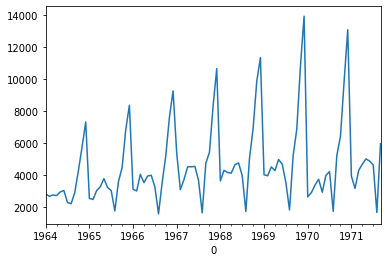

In [7]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
series.plot()
pyplot.show()

Serideki belirgin zamansal yapılara dikkat edin Some observations from the plot include:
* Zaman içinde satışlarda artış eğilimi olabilir.
* Her yıl satışlarda sistematik bir mevsimsellik olduğu görülmektedir.
* Mevsimsel sinyal zaman içinde büyüyor gibi görünmektedir, bu da çarpımsal bir ilişkiyi göstermektedir (artan değişim).
* Belirgin bir aykırı değer yok gibi görünüyor.
* Sezonluk, serinin neredeyse kesinlikle durağan olmadığını gösteriyor.

Mevsimsel bileşenin açıkça modellenmesi ve çıkarılmasında fayda olabilir. Ayrıca, seriyi sabit hale getirmek için bir veya iki seviye arasındaki farkı kullanarak da keşfedebilirsiniz. Mevsimsel bileşendeki artış eğilimi veya büyüme, bir kütük veya başka bir güç dönüşümünün kullanılmasını önerebilir.

## Seasonal Line Plots
Mevsimselliğin yıllık bir döngü olduğu varsayımını yıllara göre veri kümesinin gözbebekleri çizerek doğrulayabiliriz. Aşağıdaki örnek, 7 tam yıllık veriyi ayrı gruplar olarak alır ve her biri için bir satır grafiği oluşturur. Çizgi grafikleri, yıllara göre herhangi bir paterni tespit etmeye yardımcı olmak için dikey olarak hizalanır.

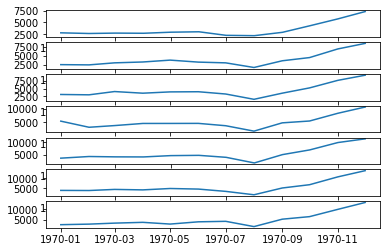

In [8]:
# multiple line plots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame() 
pyplot.figure() 
i=1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

## Density Plot
Gözlem yoğunluğunun çizimlerinin gözden geçirilmesi, verilerin yapısı hakkında daha fazla bilgi sağlayabilir. Aşağıdaki örnek, herhangi bir zamansal yapı olmaksızın gözlemlerin bir histogramını ve yoğunluk grafiğini oluşturmaktadır.

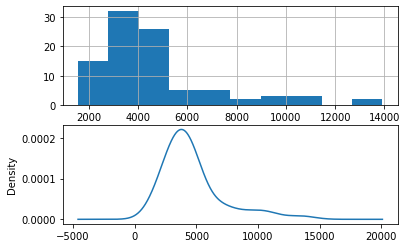

In [9]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

Some observations from the plots include:
* The distribution is not Gaussian.
* The shape has a long right tail and may suggest an exponential distribution


Bu, modellemeden önce verilerin bazı güç dönüşümlerini keşfetmeye daha fazla destek sağlar.

## Box and Whisker Plots
Aylık verileri yıllara göre gruplandırabilir ve her yıl için gözlemlerin yayılması ve bunun nasıl değişebileceği hakkında fikir edinebiliriz. Biraz eğilim görmeyi bekliyoruz (artan ortalama veya medyan), ancak dağılımın geri kalanının nasıl değiştiğini görmek ilginç olabilir. Aşağıdaki örnek, gözlemleri yıla göre gruplandırır ve her gözlem yılı için bir kutu ve bıyık grafiği oluşturur. Geçen yıl (1971) sadece 9 ay içerir ve diğer yıllar için yapılan 12 aylık gözlemlerle yararlı bir karşılaştırma olur.

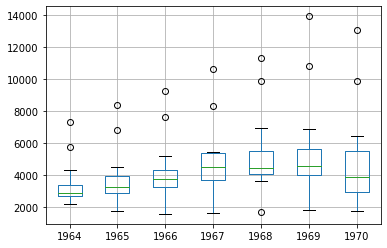

In [10]:
# boxplots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

Some observations from reviewing the plots include:
* Her yıl için ortanca değerler (kırmızı çizgi) artan bir trend gösterebilir.
* Verilerin yayılması veya orta% 50'si (mavi kutular) makul derecede kararlı görünüyor.
* Her yıl aykırı değerler vardır (kara haçlar); bunlar mevsimsel döngünün tepeleri veya dipleri olabilir.
* Son yıl, 1970, önceki yıllardaki trendden farklı görünüyor

Gözlemler belki de yıllar boyunca bir miktar büyüme eğilimi ve mevsimsel döngünün bir parçası olabilecek aykırı değerlere işaret ediyor. Verilerin bu yıllık görünümü ilginç bir yoldur ve yıldan yıla özet istatistiklere ve yıldan yıla özet istatistiklerdeki değişikliklere bakılarak daha fazla takip edilebilir.

## ARIMA Models
## Manually Configured ARIMA

ARIMA (p, d, q) modeli üç parametre gerektirir ve geleneksel olarak manuel olarak yapılandırılır. Zaman serisi verilerinin analizi, sabit bir zaman serisi ile çalıştığımızı varsayar. Zaman serileri neredeyse hiç durağan değil. Öncelikle serileri farklılaştırarak ve sonucun sabit olduğunu doğrulamak için istatistiksel bir test kullanarak bunu sabit hale getirebiliriz.

Dizideki mevsimsellik görünüşe göre yıldan yıla. Mevsimsel veriler, gözlemin bir önceki döngüde aynı saatten, bu durumda bir önceki yılın aynı ayında çıkarılmasıyla farklılık gösterebilir. Bu, fark edilecek önceki yıl olmadığı için gözlemlerin ilk yılını kaybedeceğimiz anlamına gelir. Aşağıdaki örnek, dizinin mevsimselleştirilmemiş bir sürümünü oluşturur ve bunu stationary.csv dosyasına kaydeder.

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


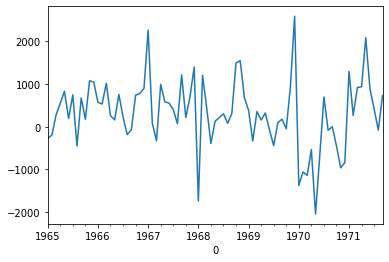

In [16]:
# create and summarize stationary version of time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year) 
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv', header=False)
# plot
stationary.plot()
pyplot.show()

Referans olması açısından, mevsimsel fark operasyonu, bir önceki yılın aynı ayı için gözlem eklenerek tersine çevrilebilir. Bu, tahminlerin mevsimsel olarak farklılaştırılmış verilere uygun bir model tarafından yapılması durumunda gereklidir. Mevsimsel fark işletimini tersine çevirme işlevi, tamlık için aşağıda listelenmiştir.

In [17]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

Farklılaştırılmış veri kümesinin bir grafiği de oluşturulur. Grafikte mevsimsel olarak farklılık gösteren veri kümesinin modelleme için iyi bir başlangıç ​​noktası olduğunu öne süren, belirgin bir mevsimsellik veya eğilim göstermemektedir. Bu veri kümesini ARIMA modeline girdi olarak kullanacağız. Ayrıca başka bir fark gerekmeyebileceğini ve d parametresinin 0 olarak ayarlanabileceğini de gösterir.

Bir sonraki ilk adım sırasıyla Otomatik Regresyon (AR) ve Hareketli Ortalama (MA) parametreleri, p ve q için gecikme değerlerini seçmektir. Bunu, Otokorelasyon Fonksiyonu (ACF) ve Kısmi Otokorelasyon Fonksiyonu (PACF) grafiklerini inceleyerek yapabiliriz. Not: Şimdi, mevsimsel olarak farklılık gösteren stationary.csv'yi veri kümemiz olarak kullanıyoruz. Bunun nedeni, gerçekleştirilen manuel mevsimsel farkın, ARIMA modeli tarafından d parametresi ile gerçekleştirilen gecikme = 1 farkından farklı olmasıdır. Aşağıdaki örnek, seri için ACF ve PACF grafikleri oluşturur.

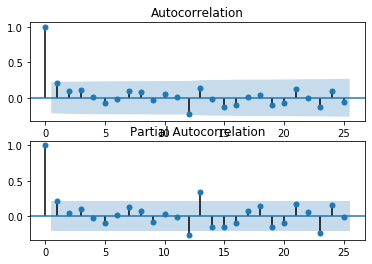

In [18]:
# ACF and PACF plots of time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv('stationary.csv', header=None, index_col=0, parse_dates=True,
    squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca())
pyplot.show()

some observations from the plots.
* The ACF shows a significant lag for 1 month.
* PACF, 1 ay boyunca önemli bir gecikme gösterir, belki de 12 ve 13 aylarda önemli bir gecikme gösterir.
* Hem ACF hem de PACF aynı noktada bir düşüş gösterir, belki de AR ve MA'nın bir karışımını gösterir.

P ve q değerleri için de iyi bir başlangıç ​​noktası 1'dir. PACF grafiği, farklılaştırılmış verilerde hâlâ bir miktar mevsimsellik olduğunu göstermektedir. Mevsimsel farklılıklardan ziyade doğrudan modelleme ve modelden açıkça çıkarma gibi daha iyi bir mevsimsellik modelini düşünebiliriz.

Bu hızlı analiz, sabit veriler üzerindeki bir ARIMA'nın (1,0,1) iyi bir başlangıç ​​noktası olabileceğini düşündürmektedir. Tarihi gözlemler, her ARIMA modelinin takılmasından önce mevsimsel olarak farklılaşacaktır. Fark, orijinal satış sayısı birimlerinde beklenen gözlemle doğrudan karşılaştırılabilir olmasını sağlamak için yapılan tüm tahminlerde tersine çevrilecektir. Deneyler, bu ARIMA konfigürasyonunun altta yatan tarafından birleşmediğini ve hatalarla sonuçlandığını göstermektedir.

Daha ileri deneyler, durağan verilere bir seviye farkın eklenmesinin modeli daha kararlı hale getirdiğini göstermiştir. Model ARIMA'ya (1,1,1) genişletilebilir.

In [20]:
# evaluate manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)


>Predicted=8089.794, Expected=8314.000
>Predicted=9742.690, Expected=10651.000
>Predicted=5986.917, Expected=3633.000
>Predicted=3886.972, Expected=4292.000
>Predicted=4038.101, Expected=4154.000
>Predicted=4992.341, Expected=4121.000
>Predicted=5156.557, Expected=4647.000
>Predicted=5046.698, Expected=4753.000
>Predicted=4143.817, Expected=3965.000
>Predicted=2102.933, Expected=1723.000
>Predicted=5228.260, Expected=5048.000
>Predicted=5873.372, Expected=6922.000
>Predicted=8571.297, Expected=9858.000
>Predicted=11005.986, Expected=11331.000
>Predicted=4087.489, Expected=4016.000
>Predicted=4771.838, Expected=3957.000
>Predicted=4676.128, Expected=4510.000
>Predicted=4583.395, Expected=4276.000
>Predicted=5117.348, Expected=4968.000
>Predicted=5208.148, Expected=4677.000
>Predicted=4436.442, Expected=3523.000
>Predicted=2180.882, Expected=1821.000
>Predicted=5471.214, Expected=5222.000
>Predicted=7337.563, Expected=6872.000
>Predicted=10268.404, Expected=10803.000
>Predicted=11725.389

## Grid Search ARIMA Hyperparameters
* p: 0 to 6.
* d: 0 to 2
* q: 0 to 6.

In [23]:
# grid search ARIMA parameters for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year) 
        model = ARIMA(diff, order=arima_order) 
        model_fit = model.fit(trend='nc', disp=0) 
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values): 
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order 
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# load dataset
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=939.464
ARIMA(4, 0, 1) RMSE=928.093
Best ARIMA(4, 0, 1) RMSE=928.093


## Review Residual Errors

                 0
count    47.000000
mean    165.904730
std     934.696204
min   -2164.247449
25%    -289.651596
50%     191.759548
75%     732.992187
max    2367.304815


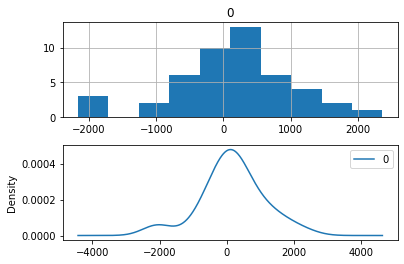

In [25]:
# summarize ARIMA forecast residuals
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211) 
residuals.hist(ax=pyplot.gca()) 
pyplot.subplot(212) 
residuals.plot(kind='kde', ax=pyplot.gca()) 
pyplot.show()

Kalan hataların dağılımı da çizilmiştir. Grafikler, belki de bir güç dönüşümünün keşfetmeye değer olabileceğine dair daha fazla kanıt sağlayan, inişli çıkışlı bir sol kuyruk ile Gauss benzeri bir dağılım olduğunu gösteriyor.

Yapılan bu tahminlere 165.904728 ortalama artık hata ekleyerek bu bilgiyi önyargıları düzeltmek için kullanabiliriz. Aşağıdaki örnek bu sapma korelasyonunu gerçekleştirir.

RMSE: 924.699
                 0
count    47.000000
mean      0.000002
std     934.696204
min   -2330.152177
25%    -455.556324
50%      25.854820
75%     567.087459
max    2201.400087


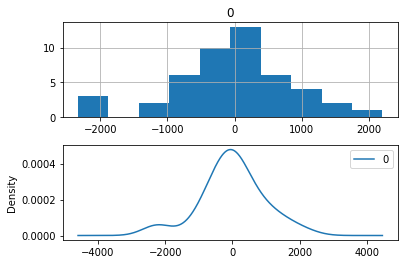

In [27]:
# plots of residual errors of bias corrected forecasts
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 165.904728
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))] 
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211) 
residuals.hist(ax=pyplot.gca()) 
pyplot.subplot(212) 
residuals.plot(kind='kde', ax=pyplot.gca()) 
pyplot.show()

Tahminlerin performansı, 939.464'ten 924.699'a çok az bir miktar geliştirildi; bu, önemli olabilir veya olmayabilir. Tahmin kalan hataların özeti, ortalamanın gerçekten sıfıra çok yakın bir değere taşındığını gösterir.

Her türlü otokorelasyon için kalan hataların zaman serilerini kontrol etmek de iyi bir fikirdir. Varsa, modelin verilerdeki zamansal yapıyı modellemek için daha fazla fırsata sahip olduğunu önerecektir. Aşağıdaki örnek, kalan hataları yeniden hesaplar ve önemli otokorelasyonu kontrol etmek için ACF ve PACF grafikleri oluşturur.

                 0
count    47.000000
mean    165.904730
std     934.696204
min   -2164.247449
25%    -289.651596
50%     191.759548
75%     732.992187
max    2367.304815


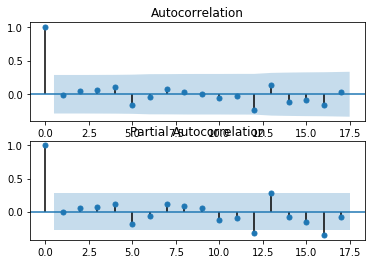

In [29]:
# ACF and PACF plots of residual errors of bias corrected forecasts
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

Sonuçlar, zaman serisinde ne kadar az otokorelasyonun model tarafından yakalandığını göstermektedir.

## Model Validation
* Finalize Model: Train and save the final model.
* Make Prediction: Load the finalized model and make a prediction. 􏰀 
* Validate Model: Load and validate the final model.

In [30]:
# save finalized model
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(4,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual 
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

## Make Prediction

In [31]:
# load finalized model and make a prediction
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year) 
print('Predicted: %.3f' % yhat)

Predicted: 6832.354


## Validate Model

>Predicted=6832.354, Expected=6981.000
>Predicted=10101.763, Expected=9851.000
>Predicted=13219.067, Expected=12670.000
>Predicted=3996.535, Expected=4348.000
>Predicted=3465.934, Expected=3564.000
>Predicted=4522.683, Expected=4577.000
>Predicted=4901.336, Expected=4788.000
>Predicted=5190.094, Expected=4618.000
>Predicted=4930.190, Expected=5312.000
>Predicted=4944.785, Expected=4298.000
>Predicted=1699.409, Expected=1413.000
>Predicted=6085.324, Expected=5877.000
RMSE: 359.655


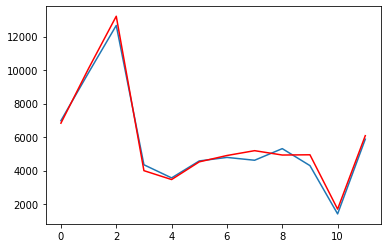

In [33]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load and prepare datasets
dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl') 
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year) 
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions)) 
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red') 
pyplot.show()

Doğrulama veri kümesine kıyasla tahminlerin bir grafiği de verilmiştir. Arsadaki bu ölçekte, 12 aylık tahmini satış rakamları harika görünüyor.